Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [1]:
# Импортируем необходимые модули
# для работы с данными.
import pandas as pd
import numpy as np

In [2]:
# для построения леса деревьев решений и обучения моделей.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# для работы с графикой.
import matplotlib.pyplot as plt

In [37]:
# Считываем файл c данными о сердечных заболеваниях.
space_df = pd.read_csv('D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\space_can_be_a_dangerous_place.csv')
space_df.head( )

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [48]:
# Отбросим колонку, которую будем предсказывать.
X = space_df.drop(['dangerous', 'buggers_were_noticed'], axis = 1)

In [49]:
y= space_df['buggers_were_noticed']

In [50]:
# Создаем модель RandomForestClassifier.
rf_space = RandomForestClassifier(random_state=0)

In [51]:
# Задаем параметры модели.
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5 , 7, 10]}

In [52]:
# Обучение Random forest моделей GridSearchCV на подмножестве train.
GridSearchCV_space_clf = GridSearchCV(rf_space, parametrs, cv=3, n_jobs=-1)
GridSearchCV_space_clf.fit(X, y)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30]})

In [53]:
GridSearchCV_space_clf.best_params_

{'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [54]:
# Проведем преобразование, позволяющее определить важность переменных.
best_space_clf = GridSearchCV_space_clf.best_estimator_

In [55]:
# Создадим атрибут feature_importances_space и сохраним его в отдельную переменную.
feature_importances_space = best_space_clf.feature_importances_

In [56]:
# Создадим DataFrame с информацией о важности переменных.
feature_importances_space = pd.DataFrame({'feature_importances': feature_importances_space},
                                            index=X.columns)\
    .sort_values(by='feature_importances', ascending=True)\
    .rename(columns={'feature_importances': 'importance'})

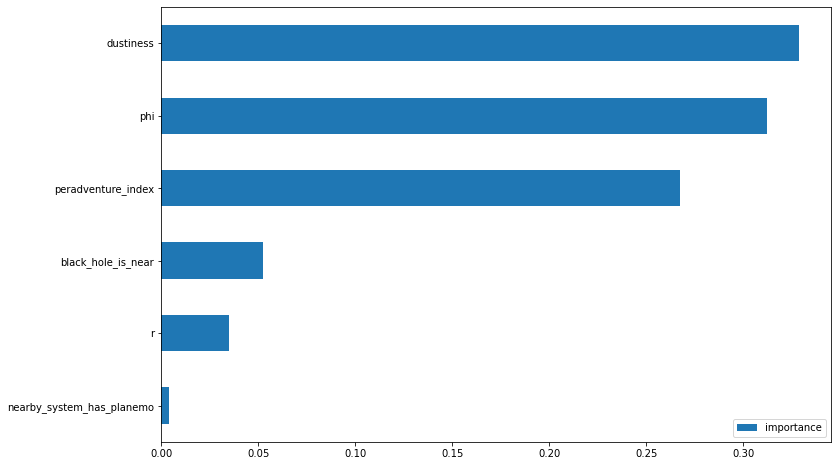

In [57]:
# Построение графика важности переменных.
feature_importances_space.plot(kind='barh', figsize=(12, 8))
plt.show()

In [58]:
feature_importances_space.sort_values('importance', ascending=False)

,importance
dustiness,0.328615
phi,0.312178
peradventure_index,0.267288
black_hole_is_near,0.052565
r,0.035148
nearby_system_has_planemo,0.004206


In [59]:
space_df.groupby('buggers_were_noticed').agg({'dangerous':'mean'}) 

,dangerous
buggers_were_noticed,
0,0.528782
1,0.930118


In [61]:
'Строк с данными : ', len(space_df)
print('Влияние жуков : ', len(space_df.query('dangerous > 0 & buggers_were_noticed > 0')) / len(space_df) * 100, '%')
print('Влияние планемо : ', len(space_df.query('dangerous > 0 & nearby_system_has_planemo > 0')) / len(space_df) * 100, '%')
print('Влияние близости к черной дыре : ', len(space_df.query('dangerous > 0 & black_hole_is_near > 0')) / len(space_df) * 100, '%')

Влияние жуков :  86.5 %
Влияние планемо :  90.202 %
Влияние близости к черной дыре :  10.414 %


In [63]:
space_df[['black_hole_is_near', 'buggers_were_noticed', 'nearby_system_has_planemo', 'dangerous']].corr()

,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
black_hole_is_near,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.002661,-0.003031,1.000000,0.299508
dangerous,0.052968,0.344469,0.299508,1.000000


In [64]:
space_df.groupby('dangerous').agg({'buggers_were_noticed': 'mean', 'black_hole_is_near': 'mean', 'nearby_system_has_planemo': 'mean'})

,buggers_were_noticed,black_hole_is_near,nearby_system_has_planemo
dangerous,,,
0,0.663299,0.059706,0.901511
1,0.958959,0.115452,1.000000
